In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models
canv = ROOT.TCanvas("canv","canv",800,400)

Welcome to JupyROOT 6.20/06


In [11]:
m = 0.511 # MeV
A_Cu = 64
aem = 931.4941 # MeV/c2
M = A_Cu*aem
T = 0.500 # electron kinetic enegy
from math import sqrt
p1 = sqrt(pow(T+m,2)-pow(m,2)) # momentum of electron
beam = ROOT.TLorentzVector()
target = ROOT.TLorentzVector()
beam.SetXYZM(0,0,p1,m)
target.SetXYZM(0,0,0,M)
init = beam + target
boost = init.BoostVector()
beam.Boost(-boost)
target.Boost(-boost)
p_cms = beam.Pz()
print(beam.Py())
print(target.Px())

0.0
0.0


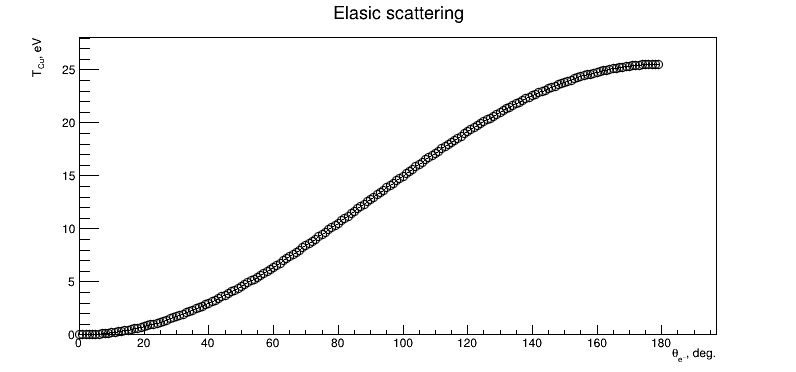

In [17]:
ve  = ROOT.TLorentzVector()
vCu = ROOT.TLorentzVector()
from math import pi, cos, sin
theta_e_lab = []
T_Cu = []
for i in range(180):
    theta_cms = pi*i/180.
    theta.append(theta_cms)
    ve.SetXYZM( 0, p_cms*sin(theta_cms), p_cms*cos(theta_cms),m)
    vCu.SetXYZM(0,-p_cms*sin(theta_cms),-p_cms*cos(theta_cms),M)
    vCu.Boost(boost)
    ve.Boost(boost)
    theta_e_lab.append( ve.Theta()*180./pi )
    T_Cu .append( (vCu.E() - M)*1000000.)
gr = makeGraph(theta_e_lab, T_Cu)
gr.SetTitle("Elasic scattering")
gr.GetXaxis().SetTitle("#theta_{e^{#minus}}, deg.")
gr.GetYaxis().SetTitle("T_{Cu}, eV")
gr.SetMarkerStyle(24)
gr.Draw("APL")
canv.Draw()